# CapsComplete
This project shows how to complete occluded images from MNIST

In [10]:
%cd /Users/vramesh/Google\ Drive/University/Sem8/Advanced\ CV/ProjectRoot/CapsComplete

/Users/vramesh/Google Drive/University/Sem8/Advanced CV/ProjectRoot/CapsComplete


## Data
### Download Data

In [ ]:
from CapsComplete.data.data_download import download
download('mnist', './data/mnist/', False)
download('fashion-mnist', './data/fashion-mnist/', False)
# data.download('affnist', './data/affnist')

### Generate Occluded Data

In [ ]:
## For MNIST
%matplotlib inline
import numpy as np
from CapsComplete.data.preprocess import load_data, occlude
from CapsComplete.analysis.visualization import plot_imgs
# Load and view some mnist occluded
teX, teY, _ = load_data('mnist', 10, is_training=False, quantity=15, path='./data/mnist/')
occX_prob = occlude(teX, occlusion=2, ox_dim=0, oy_dim=0, occ_prob=0.6)
occX_det = occlude(teX, occlusion=1, ox_dim=9, oy_dim=9, occ_prob=0)

plot_imgs(np.concatenate((teX, occX_prob, occX_det), axis=0), cols=3)


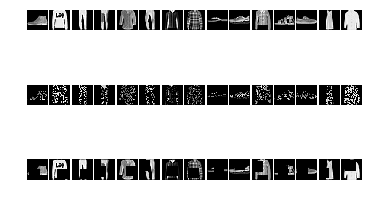

In [8]:
## For fashion-MNIST
%matplotlib inline
import numpy as np
from CapsComplete.data.preprocess import load_data, occlude
from CapsComplete.analysis.visualization import plot_imgs
# Load and view some mnist occluded
teX, teY, _ = load_data('mnist', 10, is_training=False, quantity=15, path='./data/fashion-mnist/')
occX_prob = occlude(teX, occlusion=2, ox_dim=0, oy_dim=0, occ_prob=0.6)
occX_det = occlude(teX, occlusion=1, ox_dim=14, oy_dim=14, occ_prob=0)

plot_imgs(np.concatenate((teX, occX_prob, occX_det), axis=0), cols=3)

## Training Models

In [ ]:
from CapsComplete.models.CapsNet import CapsNet
from CapsComplete.models.Autoencoder import AutoEncoder
from CapsComplete.analysis.main_operations import train
height = 28
width = 28
channels = 1
num_label = 10

In [ ]:
capsnet = CapsNet(height=28, width=28, channels=1, num_label=10, is_training=True)
num_label=10
train(capsnet, num_label, dataset='mnist', dataset_path='./data/mnist/',
      save_freq=2, num_samples=10000, batch_size=128, n_epochs=10,
      results_dir='./models/mnist/capsnet/results', log_dir='./models/mnist/capsnet/logs')

In [ ]:
autoencoder = AutoEncoder(height=28, width=28, channels=1, num_label=10, is_training=True)
num_label=10
train(autoencoder, num_label, dataset='mnist', dataset_path='./data/mnist/',
      save_freq=2, num_samples=10000, batch_size=128, n_epochs=10,
      results_dir='./models/mnist/autoencoder/results', log_dir='./models/mnist/autoencoder/logs')

## Evaluating Models

In [6]:
from CapsComplete.models.CapsNet import CapsNet
from CapsComplete.models.Autoencoder import AutoEncoder
from CapsComplete.analysis.main_operations import evaluation
from CapsComplete.data.preprocess import load_data, occlude
from CapsComplete.analysis.visualization import plot_imgs
from CapsComplete.analysis.main_operations import get_reconstruction
from CapsComplete.analysis.main_operations import get_reconstruction_w_gradient
from CapsComplete.analysis.main_operations import self_reconstruction
import numpy as np

### Accuracy Tests

In [ ]:
capsnet = CapsNet(height=28, width=28, channels=1, num_label=10, is_training=False)
test_acc_cap, recon_error_cap = evaluation(capsnet, num_label=10, dataset_path='./data/mnist/', results_dir='./models/mnist/capsnet/results', 
                                   log_dir='./models/mnist/capsnet/logs/', model_restore='./models/mnist/capsnet/logs/logsepoch_5',
                                  occlusion=2, ox_dim=0, oy_dim=0, occ_prob=0.6)
print(test_acc_cap, recon_error_cap)

In [ ]:
autoencoder = AutoEncoder(height=28, width=28, channels=1, num_label=10, is_training=False)
test_acc_auto, recon_error_auto = evaluation(autoencoder, num_label=10, dataset='mnist', dataset_path='./data/mnist/',
                                   batch_size=128,
                                   results_dir='./models/mnist/autoencoder/results', 
                                   log_dir='./models/mnist/autoencoder/logs/',
                                    model_restore='./models/mnist/autoencoder/logsepoch_9')
print(test_acc_auto, recon_error_auto)

### Reconstruction No Occlusion

In [9]:
teX, teY, _ = load_data('mnist', 10, is_training=False, quantity=15, path='./data/mnist/')

In [10]:
capsnet = CapsNet(height=28, width=28, channels=1, num_label=10, is_training=False)
_, recons_caps, predictions_caps = get_reconstruction(capsnet, teX, teY, 
                                                   model_restore='./models/mnist/capsnet/logs/logsepoch_5')

(?, 1152, 1, 8, 1)
INFO:tensorflow:Seting up the main structure
INFO:tensorflow:Restoring parameters from ./models/mnist/capsnet/logs/logsepoch_5


In [11]:
autoencoder = AutoEncoder(height=28, width=28, channels=1, num_label=10, is_training=False)
_, recons_auto, predictions_auto = get_reconstruction(autoencoder, teX, teY,
                                   model_restore='./models/mnist/autoencoder/logsepoch_9')

INFO:tensorflow:Restoring parameters from ./models/mnist/autoencoder/logsepoch_9


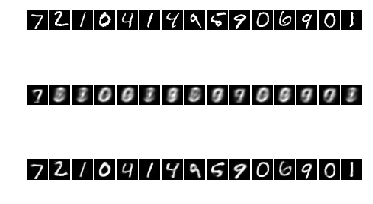

Capsule Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
AutoEnc Predictions: [3 2 1 0 4 1 4 4 2 4 0 6 4 0 1]


In [12]:
plot_imgs(np.concatenate((teX, recons_caps, recons_auto)), cols=3)
print("Capsule Predictions: {}\nAutoEnc Predictions: {}".format(predictions_caps, predictions_auto))

### Reconstruction Occlusion No Gradient

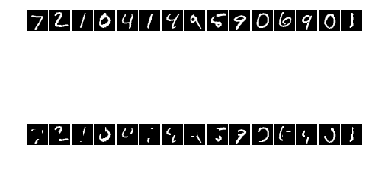

In [13]:
# Generate Occluded Images
teX, teY, _ = load_data('mnist', 10, is_training=False, quantity=15, path='./data/mnist/')
occ_imgs = occlude(teX, occlusion=1, ox_dim=12, oy_dim=12, occ_prob=0)
plot_imgs(np.concatenate((teX, occ_imgs)), cols=2)

In [14]:
capsnet = CapsNet(height=28, width=28, channels=1, num_label=10, is_training=False)
_, recons_caps, predictions_caps = get_reconstruction(capsnet, occ_imgs, teY, 
                                                   model_restore='./models/mnist/capsnet/logs/logsepoch_5')

(?, 1152, 1, 8, 1)
INFO:tensorflow:Seting up the main structure
INFO:tensorflow:Restoring parameters from ./models/mnist/capsnet/logs/logsepoch_5


In [15]:
autoencoder = AutoEncoder(height=28, width=28, channels=1, num_label=10, is_training=False)
_, recons_auto, predictions_auto = get_reconstruction(autoencoder, occ_imgs, teY,
                                   model_restore='./models/mnist/autoencoder/logsepoch_9')

INFO:tensorflow:Restoring parameters from ./models/mnist/autoencoder/logsepoch_9


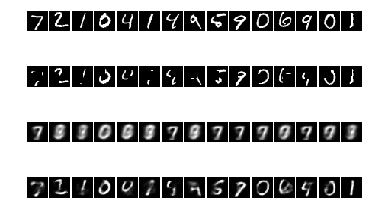

Capsule Predictions: [7 2 1 0 4 2 4 2 5 7 0 0 4 0 1]
AutoEnc Predictions: [3 2 1 0 4 2 5 4 5 8 0 6 5 0 1]


In [16]:
plot_imgs(np.concatenate((teX,occ_imgs, recons_caps, recons_auto)), cols=4)
print("Capsule Predictions: {}\nAutoEnc Predictions: {}".format(predictions_caps, predictions_auto))

### Reconstruction w/ Gradient

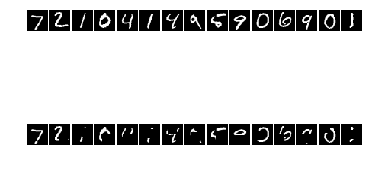

In [17]:
# Generate Occluded Images
teX, teY, _ = load_data('mnist', 10, is_training=False, quantity=15, path='./data/mnist/')
occ_imgs = occlude(teX, occlusion=1, ox_dim=12, oy_dim=12, occ_prob=0)
plot_imgs(np.concatenate((teX, occ_imgs)), cols=2)

In [21]:
capsnet = CapsNet(height=28, width=28, channels=1, num_label=10, is_training=False)
_, recons_caps, _ = get_reconstruction_w_gradient(capsnet, occ_imgs, labels=None, 
                                       model_restore='./models/mnist/capsnet/logs/logsepoch_5', 
                                       n_steps=10, lr=0.4)

(?, 1152, 1, 8, 1)
INFO:tensorflow:Seting up the main structure
INFO:tensorflow:Restoring parameters from ./models/mnist/capsnet/logs/logsepoch_5


In [22]:
autoencoder = AutoEncoder(height=28, width=28, channels=1, num_label=10, is_training=False)
_, recons_auto, _ = get_reconstruction_w_gradient(autoencoder, occ_imgs, labels=None, 
                                       model_restore='./models/mnist/autoencoder/logsepoch_9', 
                                       n_steps=10, lr=0.4)

INFO:tensorflow:Restoring parameters from ./models/mnist/autoencoder/logsepoch_9


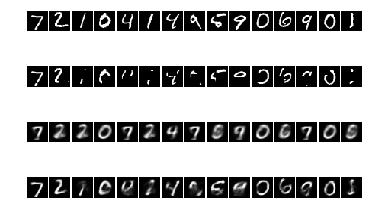

In [23]:
plot_imgs(np.concatenate((teX,occ_imgs, recons_caps, recons_auto)), cols=4)

### Self Reconstruction

In [16]:
capsnet = CapsNet(height=28, width=28, channels=1, num_label=10, is_training=False)
maximized_imgs_caps, recon_imgs_on_max_caps = self_reconstruction(capsnet, num_labels=10,img_shape=(1,28,28,1), 
                                       model_restore='./models/mnist/capsnet/logs/logsepoch_5', 
                                       iter=20)

(?, 1152, 1, 8, 1)
INFO:tensorflow:Seting up the main structure
INFO:tensorflow:Restoring parameters from ./models/mnist/capsnet/logs/logsepoch_5


In [17]:
autoencoder = AutoEncoder(height=28, width=28, channels=1, num_label=10, is_training=False)
maximized_imgs_auto, recon_imgs_on_max_auto = self_reconstruction(autoencoder, num_labels=10,img_shape=(1,28,28,1), 
                                       model_restore='./models/mnist/autoencoder/logsepoch_9', 
                                       iter=20)

INFO:tensorflow:Restoring parameters from ./models/mnist/autoencoder/logsepoch_9


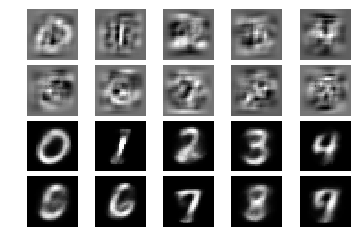

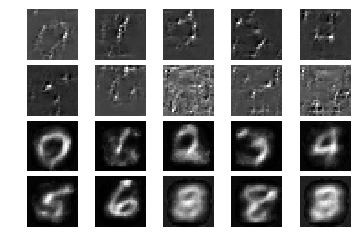

In [18]:
plot_imgs(np.concatenate((maximized_imgs_caps, recon_imgs_on_max_caps)), cols=4)
plot_imgs(np.concatenate((maximized_imgs_auto, recon_imgs_on_max_auto)), cols=4)

In [ ]:
recon_error = np.sum(np.sqrt(np.sum((imgs - out_imgs) ** 2, axis=(1,2,3) )))

In [ ]:
import numpy as np
plot_imgs(np.concatenate((teX, occ_imgs, recons), axis=0), cols=3)
print(predictions)